In [1]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import numpy as np
import seaborn as sns
from typing import List, Dict
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define a function to load and concatenate the text from multiple documents
def load_documents(file_paths: List[str]) -> str:
    all_texts = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            all_texts.append(file.read())
    return all_texts

# Define a function to perform LDA and extract topics and their keywords
def extract_topics(texts: List[str], n_topics: int, n_keywords: int) -> Dict[int, List[str]]:
    # Vectorize the documents
    vectorizer = CountVectorizer(stop_words='english', max_features=5000)
    doc_term_matrix = vectorizer.fit_transform(texts)

    # Perform LDA
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(doc_term_matrix)

    # Extract the keywords for each topic
    topics = {}
    for topic_idx, topic in enumerate(lda.components_):
        keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-n_keywords - 1:-1]]
        topics[topic_idx] = keywords

    return topics, lda, doc_term_matrix

# Define a function to plot the distribution of topics across documents
def plot_topic_distribution(lda_model, doc_term_matrix, n_topics: int):
    doc_topic_dist = lda_model.transform(doc_term_matrix)
    doc_topic_df = pd.DataFrame(doc_topic_dist, columns=[f"Topic {i+1}" for i in range(n_topics)])

    # Plot
    doc_topic_df.plot(kind='bar', stacked=True, figsize=(14, 6))
    plt.title("Topic Occurrences in Documents")
    plt.xlabel("Document")
    plt.ylabel("Topic Distribution")
    plt.legend(title='Topics')
    plt.show()

    return doc_topic_df

In [3]:

# File paths
file_paths = [
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/1992-Goodwin-Consumer_responses....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/1995 - Walker-Service encounter satisfaction....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/1995-Spreng_-Harrell_-Mackoy-Service-recovery-Impact-on....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/1997-van denbose-How Do I Judge My Outcome....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/1998-Smith, Bolton - An Experimental Investigation....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/1998-Tax, Brown, Chandrashekaran - Customer Evaluations....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/1999-Boshoff -Recovsat.docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/1999-Smith, Bolton, Wagner - A Model of Customer Satisfaction....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2001-Andreassen - From Disgust to Delight.docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2001-Maxham - Service recovery_s influence.docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2001-Sparks_McColl-Kennedy-Justice-strategy-options-for....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2002- Maxham III, Netemeyer -A Longitudinal Study....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2002-Maxham, Netemeyer - Modeling customer perceptions....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2002-Smith_Bolton-The-Effect-of-Customers Emotional-Respon....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2005-Boshoff - A re-assessment and refinement of RECOVSAT....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2005-Homburg, Fürst - How Organizational Complaint Handling Dri....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2005-Mattila, Cranage -The impact of choice on fairness.....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2006-Harris et al. -  Consumer responses to....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2006-Hocutt, Bowers, Donavan - The art of service recovery....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2006-Kau, Wan‐Yiun Loh - The effects of service recovery on....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2007-De Matos, Henrique, Alberto Vargas Rossi - Service recovery paradox....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2008-de Matos, Rossi - Word-of-mouth communications in....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2009-de Matos et al. -Consumer reaction to service failure....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2009-del Río-Lanza, Vázquez-Casielles, Díaz-Martín -Satisfaction with....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2009-McCollough, Berry, Yadav -An Empirical Investigation....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2010-Orsingher_Valentini-de-Angelis-A-meta-analysis-of-satisfaction....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2011-Gelbrich, Roschk -A Meta-Analysis of Organizational....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2012-Prasongsukarn_Patterson- An-extended-service-recovery-model....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2013-Chang, Chen -Alleviating the negative impact....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2013-Simon -The influence of empathy....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2013-Siu, Zhang, Yau - The Roles of Justice....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2014-Mostafa_-Lages_Sääksjärvi- The-CURE-scale-a-multidimension....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2014-Roschk_Gelbrich- Identifying-Appropriate-Compensation....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2015-Aksoy et al. - Relative measures in service research.docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2015-Bambauer-Sachse, Rabeson - Service recovery for....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2015-Li -Switching barriers and customer retention....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2016-Singh, Crisafulli - Managing online service....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2017-Abney et al. - #IHateYourBrand adaptive....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2017-Hogreve, Bilstein, Mandl - Unveiling the recovery time zone of....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2017-Joosten, Bloemer, Hillebrand - Consumer control in service re....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2017-Jung, Seock - Effect of service recovery on customers’ perc....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2017-Roschk_Gelbrich-Compensation-Revisited-A-Social-Resource....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2018-Tang-et-al.-2018-Timing-and-compensation....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2019- You et al. -When and Why Saying “Thank You”....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2020-Baier et al. -Will the customers....docx',
    'C:/Dev/aiproff_myaipoc/DrPriyankaSuresh_TM/SATLR_WORD/SATLR_WORD/2020-Kamath, Pai, Prabhu - Determinants of recovery satisfacti....docx'
]

# Extract topics and their keywords
#topics, lda_model, doc_term_matrix = extract_topics(texts, n_topics, n_keywords)

#topics

In [4]:

# Define a function to clean the text by removing punctuation, stopwords, and special characters
def clean_text(text: str) -> str:
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    stopwords = ENGLISH_STOP_WORDS
    text_words = text.split()
    text = ' '.join(word for word in text_words if word.lower() not in stopwords)

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Regex pattern to match common research paper terms and patterns
    pattern = r'\b(?:et al\.)\b|\bvol\.\s*\d+\b|\bpp\.\s*\d+-\d+\b|\b(?:19|20)\d{2}\b|[A-Za-z]+,?\s+[A-Za-z]+\.?\s+\b(?:19|20)\d{2}\b|[\w\s]+Journal of [\w\s]+'

    # Remove matched patterns
    #text = re.sub(pattern, '', text)

    return text



In [5]:
from docx import Document

# Define a function to read text from a .docx file
def read_docx(file_path: str) -> str:
    doc = Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

# Load and concatenate text from all .docx documents
texts = [read_docx(file_path) for file_path in file_paths]

# Extract topics and their keywords again
#topics, lda_model, doc_term_matrix = extract_topics(texts, n_topics, n_keywords)

#topics


In [6]:
# Clean each document's text
cleaned_texts = [clean_text(text) for text in texts]

In [7]:
cleaned_texts[:2]

['J BUSN RES Consumer Responses Service Failures Influence Procedural Interactional Fairness Perceptions Cathy Goodwin University Manitoba Ivan Ross University Minnesota study suggests consumer responses service failures influenced perceptions procedural interactional fairness Procedural fairness op erationalized consumers opportunity present information express feelings voice lnteractional fairness operationalized apology consumer x betweensubjects experimental design manipulated levels complaint outcome apology voice type service Apology voice appeared enhance fairness satisfaction perceptions favorable outcome condition consumers offered discount gift service failure tangible offering apology voice lesser effect instances associated lower perceptions fairness sat isfaction Implications practitioners researchers discussed Introduction years researchers practitioners demonstrated strong consumer perceptions service quality Services produced consumed simultaneously service delivery fre

In [66]:

# Load and concatenate text from all documents
#texts = load_documents(file_paths)

# Regex pattern to match common research paper terms and patterns
#pattern = r'\b(?:et al\.)\b|\bvol\.\s*\d+\b|\bpp\.\s*\d+-\d+\b|\b(?:19|20)\d{2}\b|[A-Za-z]+,?\s+[A-Za-z]+\.?\s+\b(?:19|20)\d{2}\b|[\w\s]+Journal of [\w\s]+'
#pattern = r'\b(?:et al\.)\b|\bvol\.\s*\d+\b|\bpp\b|[\w\s]+Journal of [\w\s]+'


# Remove matched patterns
#cleaned_text1 = [re.sub(pattern, '', element) for element in cleaned_texts]

#print(cleaned_text1)

#cleaned_text1 = re.sub(pattern, '', cleaned_texts)



In [10]:
# Number of topics and keywords per topic
n_topics = 10
n_keywords = 10


# Extract topics and their keywords from the cleaned texts
clean_topics, clean_lda_model, clean_doc_term_matrix = extract_topics(cleaned_texts, n_topics, n_keywords)

print(clean_topics)
#print(clean_doc_term_matrix)


{0: ['outcome', 'compensation', 'fairness', 'participants', 'type', 'effect', 'information', 'voice', 'justice', 'social'], 1: ['service', 'recovery', 'customers', 'satisfaction', 'customer', 'disconfirmation', 'research', 'journal', 'intent', 'complaining'], 2: ['thorsten', 'converted', 'rights', 'ers', 'continuum', 'local', 'illustrates', 'wanyiun', 'pertinent', 'httpwwwsagepubcomjournalsreprintsnav'], 3: ['intent', 'recovery', 'firm', 'satisfaction', 'time', 'purchase', 'overall', 'wom', 'customers', 'failures'], 4: ['satisfaction', 'service', 'customers', 'wom', 'customer', 'intentions', 'recovery', 'effect', 'studies', 'research'], 5: ['justice', 'satisfaction', 'complaint', 'customer', 'service', 'journal', 'research', 'effects', 'marketing', 'handling'], 6: ['service', 'justice', 'satisfaction', 'failure', 'customers', 'recovery', 'customer', 'research', 'complaint', 'effect'], 7: ['service', 'recovery', 'journal', 'satisfaction', 'customer', 'failure', 'customers', 'marketing',

In [11]:
print(clean_doc_term_matrix)


  (0, 10)	1
  (0, 11)	1
  (0, 16)	1
  (0, 21)	1
  (0, 29)	1
  (0, 34)	4
  (0, 35)	1
  (0, 42)	1
  (0, 47)	1
  (0, 54)	1
  (0, 56)	1
  (0, 57)	1
  (0, 65)	1
  (0, 66)	1
  (0, 67)	1
  (0, 68)	2
  (0, 75)	1
  (0, 80)	1
  (0, 81)	3
  (0, 83)	2
  (0, 85)	1
  (0, 105)	4
  (0, 115)	3
  (0, 124)	1
  (0, 132)	1
  :	:
  (45, 4847)	1
  (45, 4862)	3
  (45, 4863)	1
  (45, 4865)	1
  (45, 4869)	1
  (45, 4878)	2
  (45, 4889)	2
  (45, 4899)	1
  (45, 4906)	3
  (45, 4912)	4
  (45, 4920)	1
  (45, 4923)	3
  (45, 4926)	1
  (45, 4927)	1
  (45, 4928)	2
  (45, 4932)	1
  (45, 4947)	1
  (45, 4959)	1
  (45, 4965)	2
  (45, 4970)	1
  (45, 4971)	1
  (45, 4972)	1
  (45, 4973)	1
  (45, 4984)	2
  (45, 4988)	2


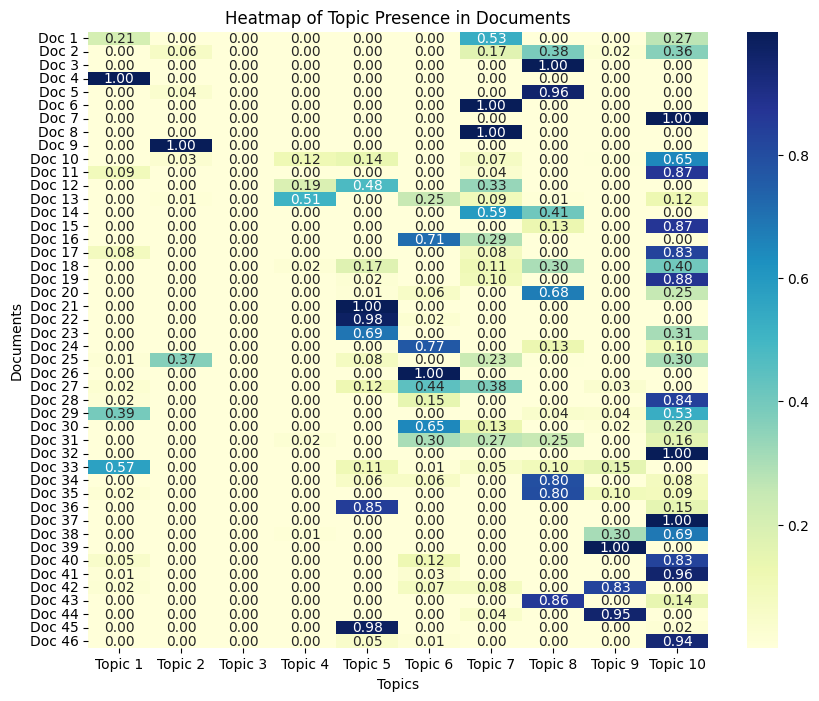

In [9]:
# Compute the topic distribution for each document
clean_doc_topic_dist = clean_lda_model.transform(clean_doc_term_matrix)

# Create a heatmap for the topic distribution across documents
plt.figure(figsize=(10, 8))
sns.heatmap(clean_doc_topic_dist, annot=True, cmap='YlGnBu', fmt=".2f", xticklabels=[f"Topic {i+1}" for i in range(n_topics)], yticklabels=[f"Doc {i+1}" for i in range(len(texts))])
plt.title("Heatmap of Topic Presence in Documents")
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.show()
